# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool


In [ ]:
! wget -O vwap_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/vwap_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' vwap_crossover.py

In [5]:
from vwap_crossover import VWAPCrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130142,
 'strategyId': '8d57a1fdf8cf4d54ae02d9f7f95fa62f'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('ITC', exchange='NSE')
instrument

[{'id': 32, 'value': 'NSE:ITC'},
 {'id': 1674232, 'value': 'NSE:ITC.AF'},
 {'id': 1674277, 'value': 'NSE:ITC.BL'},
 {'id': 2552289, 'value': 'NSE:ITC.RL'},
 {'id': 243469, 'value': 'NSE:KILITCH'},
 {'id': 86929, 'value': 'NSE:KILITCH.BE'},
 {'id': 1921593, 'value': 'NSE:MITCON'},
 {'id': 1918840, 'value': 'NSE:MITCON.BE'},
 {'id': 1918841, 'value': 'NSE:MITCON.BL'},
 {'id': 1918842, 'value': 'NSE:MITCON.IQ'}]

## Setup Parameters

In [9]:
parameters = {
    'TIME_PERIOD': 7
}

In [10]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:ITC', 
    lots=15,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy ' VWAP Crossover ' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════╕
│ Config                  │ Value                     │
╞═════════════════════════╪═══════════════════════════╡
│ Strategy Name           │ VWAP Crossover            │
├─────────────────────────┼───────────────────────────┤
│ Trading Type            │ BACKTESTING               │
├─────────────────────────┼───────────────────────────┤
│ Instrument(s)           │ ['NSE:ITC']               │
├─────────────────────────┼───────────────────────────┤
│ Quantity/Lots           │ 15                        │
├─────────────────────────┼───────────────────────────┤
│ Start Timestamp         │ 2021-08-01 09:15:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ End Timestamp           │ 2023-07-31 15:30:00+05:30 │
├─────────────────────────┼───────────────────────────┤
│ Parameters              │ {'TIME_PERIOD': 7}        │
├─────────────────────────┼────────────

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

In [14]:
print(logs)

[2023-08-22 20:04:53] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 20:04:53] Sanity checks on cfg successful.
[2023-08-22 20:04:53] Currency set to "INR"
[2023-08-22 20:04:53] Setting up broker connection...
[2023-08-22 20:04:55] Broker connection has been setup successfully.
[2023-08-22 20:04:55] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '7000.00'
[2023-08-22 20:04:55] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 20:04:55] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 20:04:55] Reading strategy...
[2023-08-22 20:04:55] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   #  

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [16]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy, country='India')
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NSE                      ITC 2021-08-02 10:15:00+05:30   
1                  NSE                      ITC 2021-08-02 12:15:00+05:30   
2                  NSE                      ITC 2021-08-02 14:15:00+05:30   
3                  NSE                      ITC 2021-08-03 13:15:00+05:30   
4                  NSE                      ITC 2021-08-03 14:15:00+05:30   
..                 ...                      ...                       ...   
850                NSE                      ITC 2023-06-08 15:15:00+05:30   
851                NSE                      ITC 2023-06-09 10:15:00+05:30   
852                NSE                      ITC 2023-06-09 14:15:00+05:30   
853                NSE                      ITC 2023-06-12 14:15:00+05:30   
854                NSE                      ITC 2023-06-13 12:15:00+05:30   

    entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                      BUY              15              ₹       206.75   
1                     SELL              15              ₹       206.15   
2                      BUY              15              ₹       206.85   
3                     SELL              15              ₹       209.05   
4                      BUY              15              ₹       209.40   
..                     ...             ...            ...          ...   
850                   SELL              15              ₹       442.55   
851                    BUY              15              ₹       441.70   
852                   SELL              15              ₹       438.80   
853                    BUY              15              ₹       436.70   
854                   SELL              15              ₹       442.35   

               exit_timestamp exit_transaction_type  exit_quantity  \
0   2021-08-02 12:15:00+05:30                  SELL             15   
1   2021-08-02 14:15:00+05:30                   BUY             15   
2   2021-08-02 15:30:00+05:30                  SELL             15   
3   2021-08-03 14:15:00+05:30                   BUY             15   
4   2021-08-03 15:30:00+05:30                  SELL             15   
..                        ...                   ...            ...   
850 2023-06-08 15:30:00+05:30                   BUY             15   
851 2023-06-09 14:15:00+05:30                  SELL             15   
852 2023-06-09 15:30:00+05:30                   BUY             15   
853 2023-06-12 15:30:00+05:30                  SELL             15   
854 2023-06-13 13:15:00+05:30                   BUY             15   

    exit_currency  exit_price  pnl_absolute  pnl_cumulative_absolute  
0               ₹      206.15         -9.00                    -9.00  
1               ₹      206.85        -10.50                   -19.50  
2               ₹      207.35          7.50                   -12.00  
3               ₹      209.40         -5.25                   -17.25  
4               ₹      209.85          6.75                   -10.50  
..            ...         ...           ...                      ...  
850             ₹      442.55          0.00                  -288.75  
851             ₹      438.80        -43.50                  -332.25  
852             ₹      438.55          3.75                  -328.50  
853             ₹      436.85          2.25                  -326.25  
854             ₹      444.00        -24.75                  -351.00  

[855 rows x 14 columns]

### Statistics Reports

#### Statistics

In [17]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-06-13
Risk-Free Rate      0.0%
Time in Market      88.0%

Cumulative Return   -4.89%
CAGR﹪              -2.66%

Sharpe              -0.18
Prob. Sharpe Ratio  37.01%
Sortino             -0.26
Sortino/√2          -0.18
Omega               0.96

Max Drawdown        -19.27%
Longest DD Days     468

Gain/Pain Ratio     -0.05
Gain/Pain (1M)      -0.16

Payoff Ratio        1.59
Profit Factor       0.96
Common Sense Ratio  1.29
CPC Index           0.58
Tail Ratio          1.34
Outlier Win Ratio   5.22
Outlier Loss Ratio  3.28

MTD                 -0.55%
3M                  1.34%
6M                  -6.61%
YTD                 -7.74%
1Y                  -7.75%
3Y (ann.)           -2.66%
5Y (ann.)           -2.66%
10Y (ann.)          -2.66%
All-time (ann.)     -2.66%

Avg. Drawdown       -1.87%
Avg. Drawdown Days  35
Recovery Factor     -0.25
Ulcer Index         0.08
Serenity Index 

#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-06-13
Risk-Free Rate             0.0%
Time in Market             88.0%

Cumulative Return          -4.89%
CAGR﹪                     -2.66%

Sharpe                     -0.18
Prob. Sharpe Ratio         37.01%
Smart Sharpe               -0.16
Sortino                    -0.26
Smart Sortino              -0.23
Sortino/√2                 -0.18
Smart Sortino/√2           -0.16
Omega                      0.96

Max Drawdown               -19.27%
Longest DD Days            468
Volatility (ann.)          6.92%
Calmar                     -0.14
Skew                       -1.35
Kurtosis                   30.51

Expected Daily %           -0.01%
Expected Monthly %         -0.22%
Expected Yearly %          -1.66%
Kelly Criterion            -1.43%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.72%
Expected Shortfall (cVaR)  -0.72%

Max Consecutive

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2022-03-02  2023-02-22  2023-06-13   468    -19.271824        -18.372086
2  2021-09-02  2021-09-16  2021-10-22    50     -4.262078         -4.063111
3  2022-01-04  2022-01-25  2022-02-15    42     -2.868199         -2.663328
4  2021-10-25  2021-10-29  2021-11-08    14     -1.745888         -1.296348
5  2021-12-10  2021-12-13  2021-12-23    12     -1.238045         -1.208568

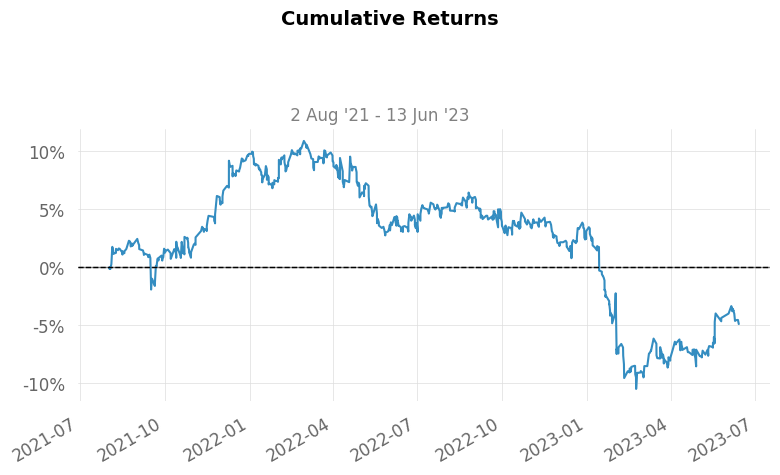

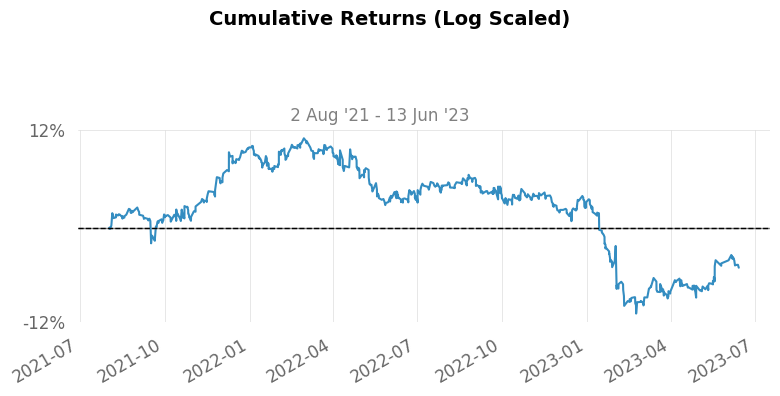

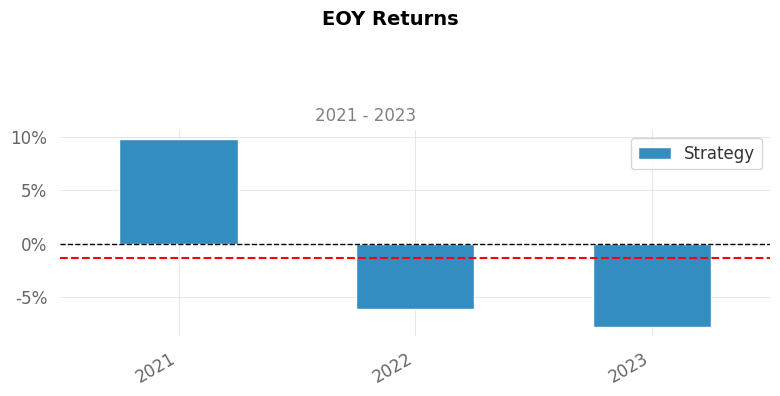

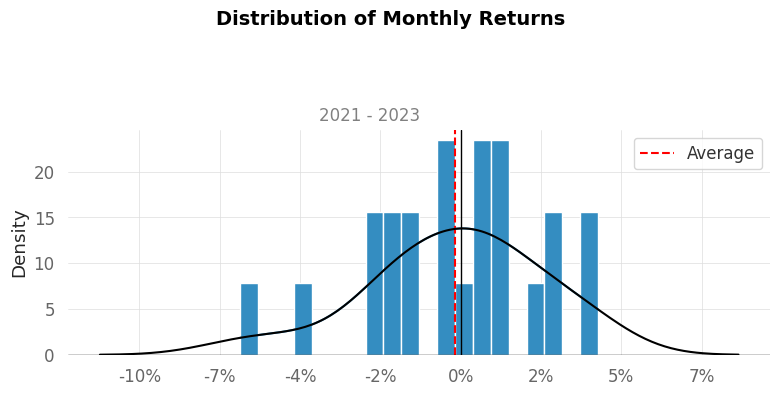

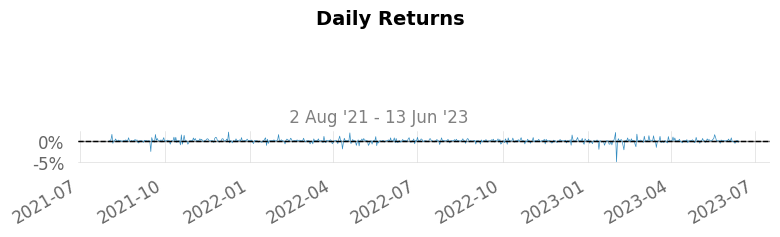

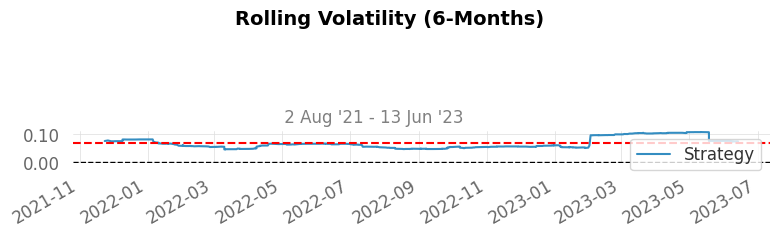

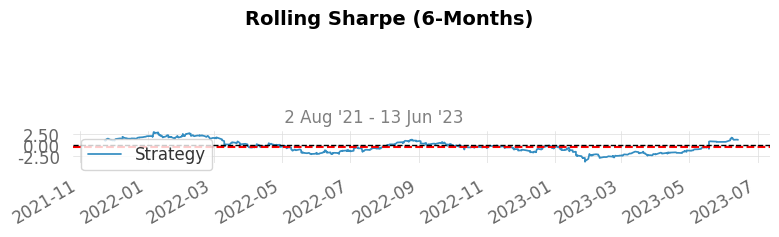

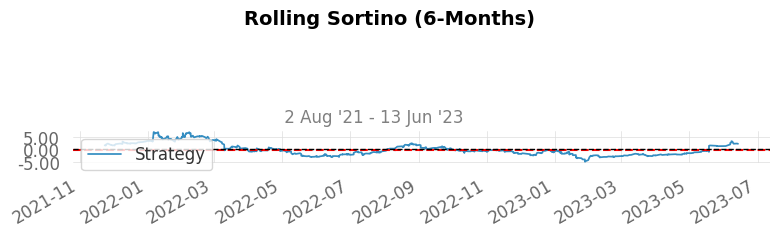

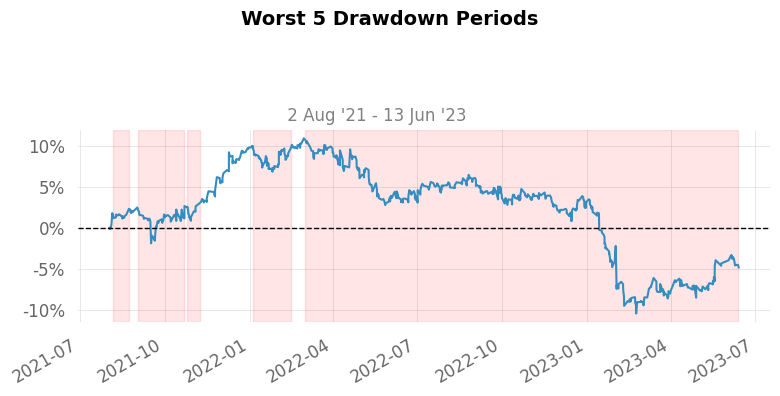

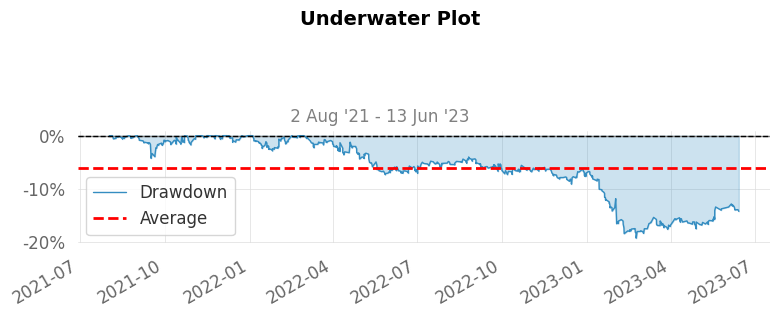

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


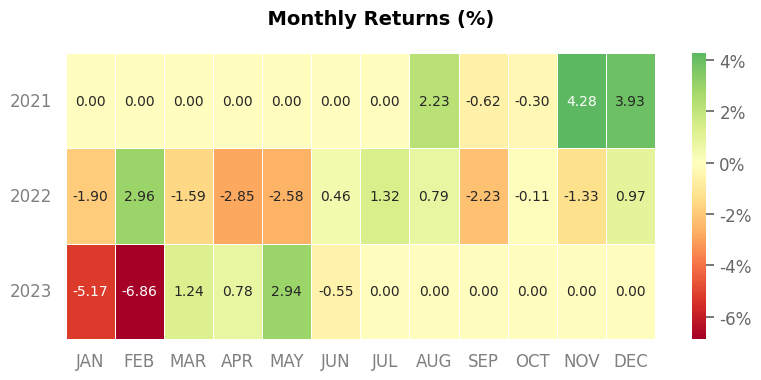

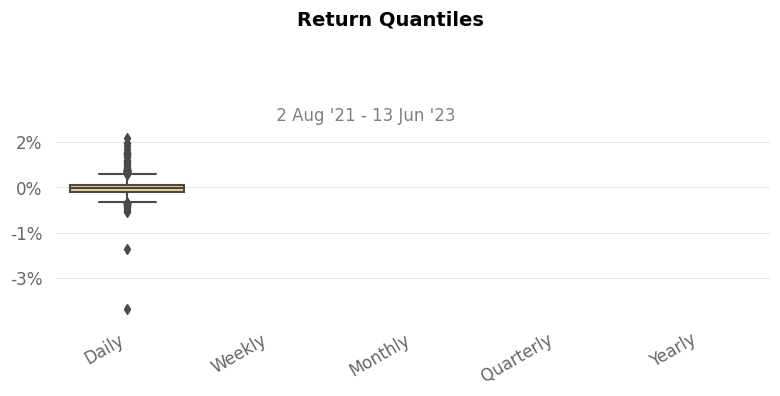

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [18]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [19]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+------------+---------------------------+----------------------------------+------+
| INST       | TIME                      | ID                               | TT   |
|------------+---------------------------+----------------------------------+------|
| NSE_EQ:ITC | 2021-08-02 10:15:00+05:30 | d1adfea943ae40bebfafe5d2d90fe5ed | BUY  |
+------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-02 10:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-02 10:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-02 10:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-02 10:15:00+05:30 | OPEN                   |       |
|  4 | 2021-08-02 10:15:00+05:30 | COMPLETE               |       |
+----+-----------------------

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---